# Neural Networks

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

## Moons

### Loading the dataset and splitting it

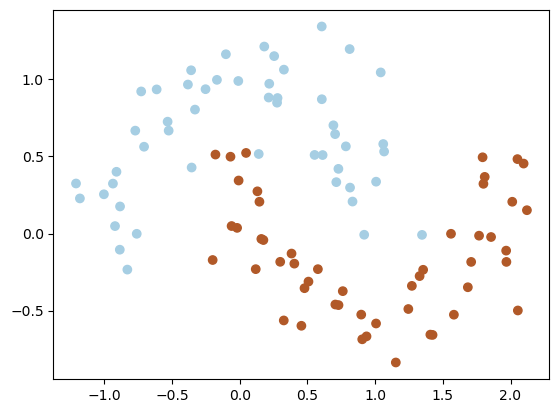

In [24]:
X, y = make_moons(noise=0.2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Building and Training the model

In [26]:
clf = MLPClassifier(hidden_layer_sizes=500).fit(X_train, y_train)
clf.predict(X_test)

/opt/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0])

### Model evaluation

In [27]:
print(f'Score on training set: {clf.score(X_train, y_train)}')
print(f'Score on test set: {clf.score(X_test, y_test)}')
print(f'Loss value: {clf.loss_}')

Score on training set: 0.92
Score on test set: 0.88
Loss value: 0.18111935581966365


### Visualisation

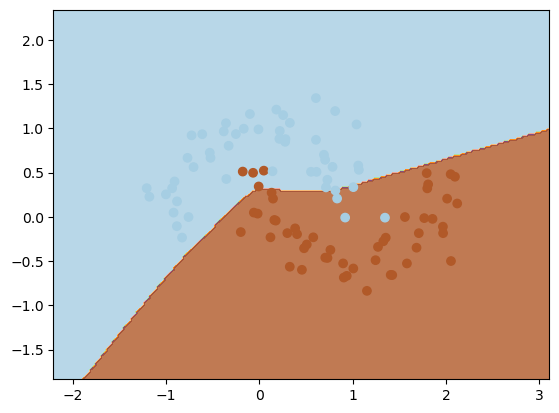

In [28]:
step = .02
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, step),
                     np.arange(y_min, y_max,step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

### Discussions

1. Not much effect.
2. We can understand how, and where the Neural Network generalizes.
3. If linearly separable, the decision boundary can be made with no error.

## MNIST

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [30]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images by scaling the pixel values to the range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [31]:
# Reshape the image data for the neural network
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
# Create a Sequential model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model on the training dataset
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10


2024-06-14 14:47:31.972698: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.2232 - accuracy: 0.9348 - val_loss: 0.1257 - val_accuracy: 0.9610
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0890 - accuracy: 0.9737 - val_loss: 0.0939 - val_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0831 - val_accuracy: 0.9767
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.1048 - val_accuracy: 0.9708
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0881 - val_accuracy: 0.9764
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0877 - val_accuracy: 0.9770
Epo

313/313 [==============================] - 1s 3ms/step


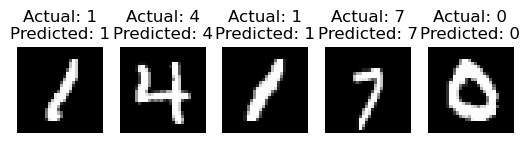

In [35]:
# Make predictions on the test dataset
predictions = model.predict(x_test)

# Visualize some predictions alongside actual images and labels
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples)

for i, idx in enumerate(random_indices):
    # Display the actual image and label
    actual_image = x_test[idx].reshape(28, 28)
    actual_label = np.argmax(y_test[idx])

    # Display the predicted label
    predicted_label = np.argmax(predictions[idx])

    # Plot the actual and predicted images
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(actual_image, cmap='gray')
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.show()